In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm 

plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
# read in the cleaned csv dataset 
sf_df = pd.read_csv("./Building_Permits_Clean.csv")

In [4]:
# rename columns to make it useable for plot scatter 
sf_df.rename(columns={"Permit Type": "Permit_type", 
                                  "Street Number":"Street_number", 
                                  "Number of Existing Stories": "Nr_of_existing_stories",
                                  "Estimated Cost":"Estimated_cost",
                                  "Revised Cost":"Revised_cost"}, inplace=True)

#sf_df.rename(columns = {"Permit Type": "Permit_type", 
                                 # "Street Number":"Street_number", 
                                  #"Number of Existing Stories": "Nr_of_existing_stories"
                                  #"Estimated Cose": "Estimated_cost"
                                  #"Revised Cost": "Revised_cost"}) 

In [5]:
sf_df.shape

(143814, 24)

In [6]:
sf_df.head(5)

,Unnamed: 0,Permit_type,Permit Creation Date,Block,Lot,Street_number,Street Name,Street Suffix,Current Status,Current Status Date,...,Permit Expiration Date,Estimated_cost,Revised_cost,Existing Use,Existing Units,Plansets,Existing Construction Type,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0,4,05/06/2015,0326,023,140,Ellis,St,expired,12/21/2017,...,11/03/2016,4000.0,4000.0,tourist hotel/motel,143.0,2.0,3.0,3.0,Tenderloin,94102.0
1,1,4,04/19/2016,0306,007,440,Geary,St,issued,08/03/2017,...,12/03/2017,1.0,500.0,tourist hotel/motel,1.0,2.0,3.0,3.0,Tenderloin,94102.0
2,3,8,11/07/2016,0156,011,1230,Pacific,Av,complete,07/24/2017,...,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,2.0,5.0,3.0,Nob Hill,94109.0
3,4,6,11/28/2016,0342,001,950,Market,St,issued,12/01/2017,...,12/01/2018,100000.0,100000.0,retail sales,1.0,2.0,3.0,6.0,Tenderloin,94102.0
4,5,8,06/14/2017,4105,009,800,Indiana,St,issued,07/06/2017,...,07/01/2018,4000.0,4000.0,apartments,326.0,2.0,1.0,10.0,Potrero Hill,94107.0


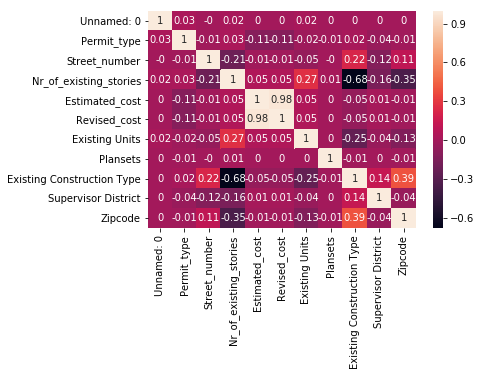

In [7]:
correlation_matrix = sf_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Text(0, 0.5, 'price')

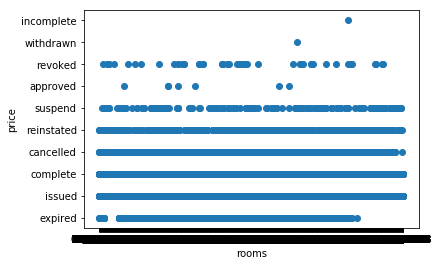

In [9]:
plt.scatter(sf_df['Permit Creation Date'], sf_df['Current Status'])
plt.xlabel('rooms')
plt.ylabel('price')

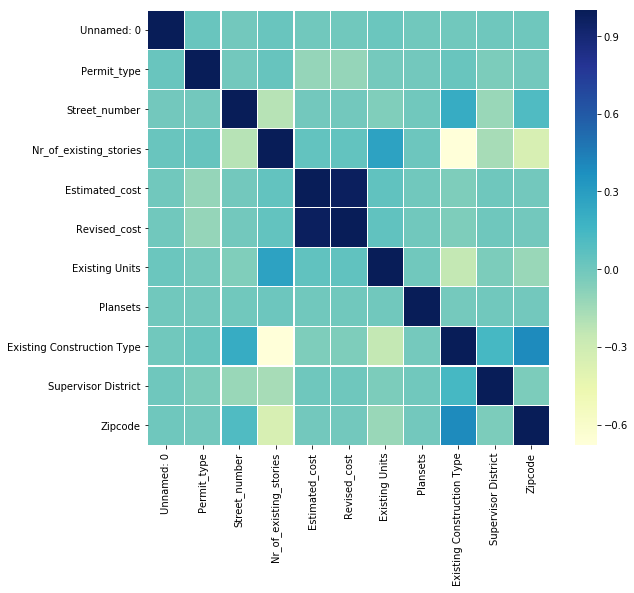

In [10]:
corrmat = sf_df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 